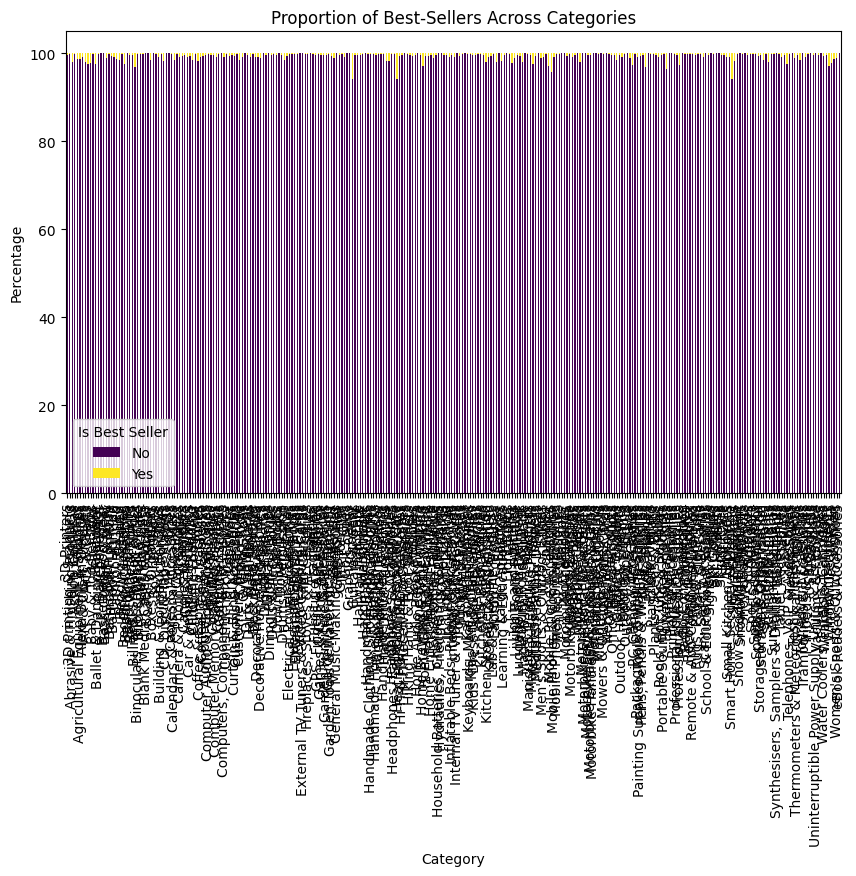

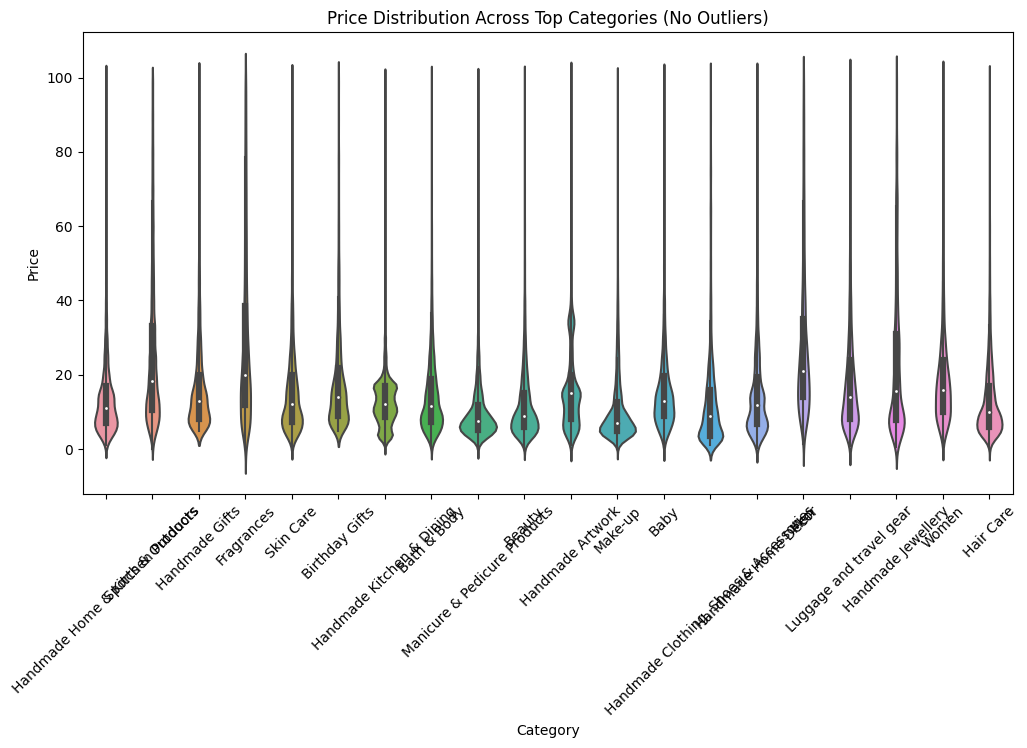

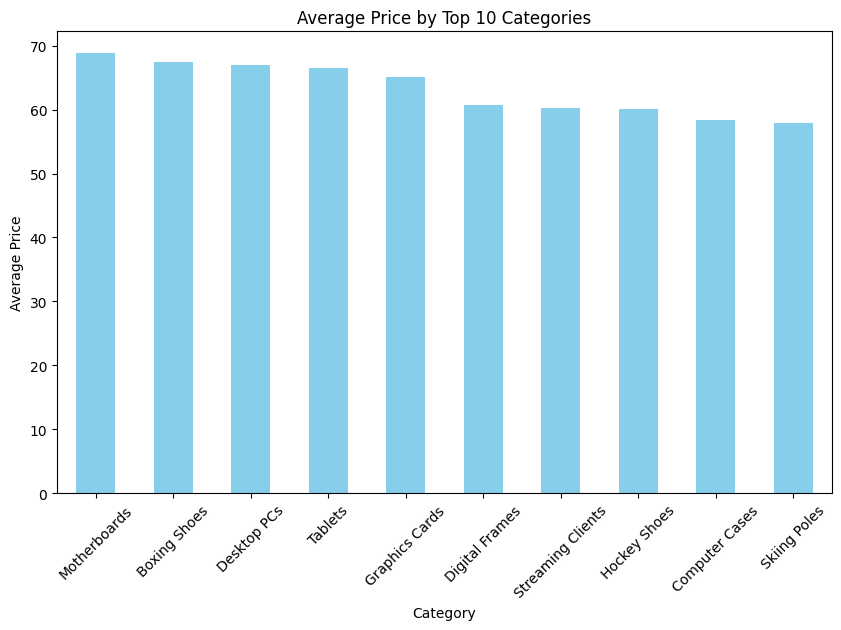

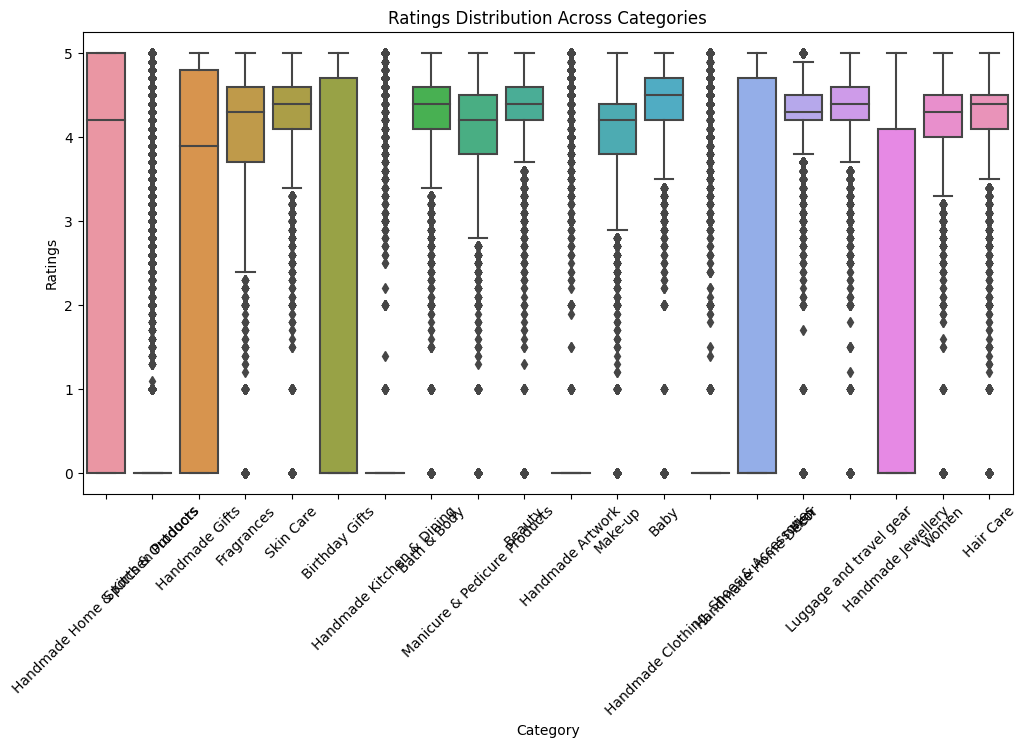

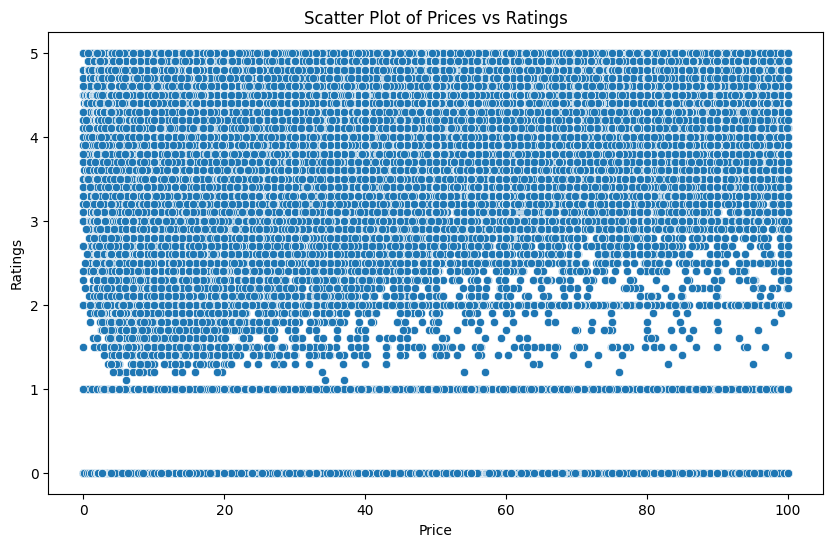

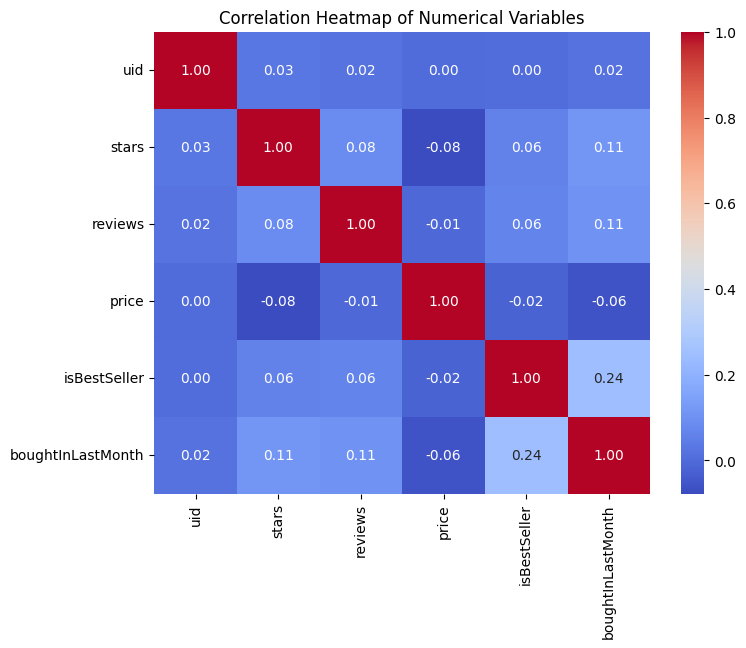

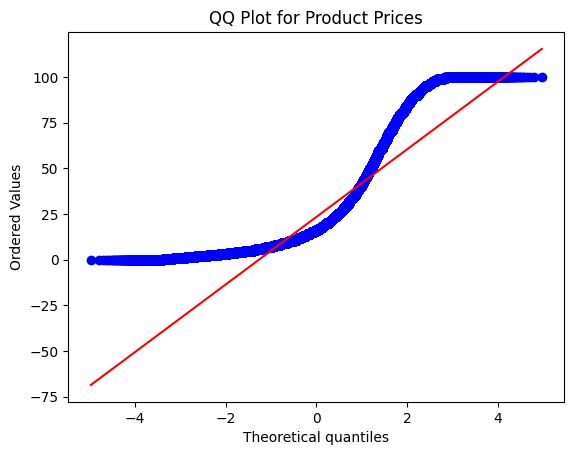

{'Chi-square Statistic': 36540.20270061387,
 'p-value (Chi-square)': 0.0,
 "Cramér's V": 0.1222829439760564,
 'Correlation Coefficient (Price vs Ratings)': -0.07767299878179289,
 'p-value (Correlation)': 0.0}

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chi2, pearsonr
import numpy as np
import scipy.stats as stats

file_path = 'C:/Users/Andre/OneDrive/Documents/GitHub/amz_uk_price_prediction_dataset.csv'
data = pd.read_csv(file_path)

# --- Part 1: Analyzing Best-Seller Trends ---

# Crosstab Analysis
crosstab = pd.crosstab(data['category'], data['isBestSeller'], normalize='index') * 100
crosstab_sorted = crosstab.sort_values(True, ascending=False)

# Statistical Test: Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(data['category'], data['isBestSeller']))
cramers_v = np.sqrt(chi2_stat / (data.shape[0] * min(crosstab.shape[0] - 1, crosstab.shape[1] - 1)))

# Stacked Bar Chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Proportion of Best-Sellers Across Categories")
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.legend(title="Is Best Seller", labels=["No", "Yes"])
plt.show()

# --- Part 2: Exploring Product Prices and Ratings ---

# Remove Outliers in Price
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# Violin Plot for Price Distribution by Category
top_categories = data_no_outliers['category'].value_counts().head(20).index
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_no_outliers[data_no_outliers['category'].isin(top_categories)], x='category', y='price')
plt.title("Price Distribution Across Top Categories (No Outliers)")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

# Bar Chart for Average Price by Top 10 Categories
avg_price_top_10 = data_no_outliers.groupby('category')['price'].mean().nlargest(10)
avg_price_top_10.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Average Price by Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

# Box Plot for Ratings by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_no_outliers[data_no_outliers['category'].isin(top_categories)], x='category', y='stars')
plt.title("Ratings Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Ratings")
plt.xticks(rotation=45)
plt.show()

# --- Part 3: Analyzing Prices and Ratings ---

# Correlation Coefficient
correlation, p_value = pearsonr(data_no_outliers['price'], data_no_outliers['stars'])

# Scatter Plot for Prices vs Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_no_outliers, x='price', y='stars')
plt.title("Scatter Plot of Prices vs Ratings")
plt.xlabel("Price")
plt.ylabel("Ratings")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_no_outliers.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# QQ Plot for Price Normality Check
stats.probplot(data_no_outliers['price'], dist="norm", plot=plt)
plt.title("QQ Plot for Product Prices")
plt.show()

# Displaying Summary Statistics
summary_stats = {
    "Chi-square Statistic": chi2_stat,
    "p-value (Chi-square)": p_val,
    "Cramér's V": cramers_v,
    "Correlation Coefficient (Price vs Ratings)": correlation,
    "p-value (Correlation)": p_value
}
summary_stats
